C:\Users\SHUBH\AppData\Local\Temp\ipykernel_3620\1059702377.py:18: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  Adj = nx.adjacency_matrix(graph)


[  6   0  46  59   0   0  16  96  39  87  67   8   0   1  38  16  21  80
  13  94  16 106  21  26  37  31  28  74  35  30 109  35  39  39  64  53
  43  36  69  32  44  24   4  33  34  63  45  62  43  36 110  42  58  58
  30  96  27  63  83  57  28  52  63  45  52  31  63  45  63  27   4  78
  77  15  78  74  67  27  92  34  92  41 103  73 104  12  85  88  98  55
  72  38  78  96   7 111  75  55  84 111 102  81  67  81  17  31  21 110
  81 100  50  80  99  46  51]

<class 'numpy.ndarray'>


[  8  18   5   0  12  11  13  97  39   0  45   3   4  35 105  21  26   1
  20  97  21  13  96  34  32  53  69  74  35  34  35 105  48  32  44  54
  49  49  27  40  44 105 113  48  39  68 107  60  42 105  62  32  63  54
  34  19  27  58  66  60  47  81  57  62  11  31  57  10  37  38  87  72
  97  69  45  92  81  78  90  18   7  61  61  58  21  67  15 104  85   6
  78 105  75  94   7 107  94  72   9 102 102 114  99  82  14  41  64 111
 103  41  95  80  95  43  76]

<class 'numpy.ndarray'>


[  3  21  

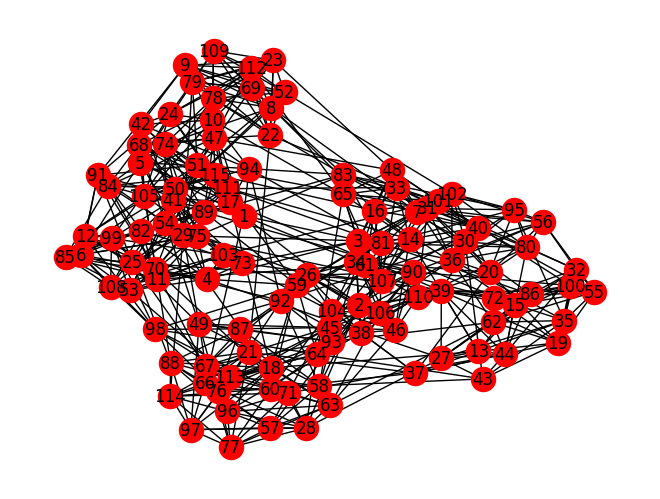

In [5]:
import networkx as nx
import numpy as np
import pandas as pd

import networkx.algorithms.community as nx_comm

import math






def community_detection(nodes,edges,population=15,generation=30,r=1.5):
    graph=nx.Graph() 
    graph.add_nodes_from(nodes) #adds nodes
    graph.add_edges_from(edges) #add edges
    Adj = nx.adjacency_matrix(graph) 
    nodes_length = len(graph.nodes())
    nx.draw(graph, with_labels=True,node_color = "red")
    d = {"chrom":[generate_chrom(nodes_length,Adj) for n in range(population)]}
    dframe = pd.DataFrame(data= d)
    dframe["subsets"] = dframe["chrom"].apply(find_subsets)
#     dframe["community_score"]=dframe.apply(lambda x: community_score(x["chrom"],x["subsets"],r,Adj),axis=1)
#     gen = 0
#     population_count = population
#     W = 0.70
#     c1 = 0.20
#     c2 = 0.60
#     CP = [i for i, target in dframe.iterrows()]
#     CC = [target['chrom'] for i, target in dframe.iterrows()]
#     CS = [target['subsets'] for i, target in dframe.iterrows()]
#     CF = [target['community_score'] for i, target in dframe.iterrows()]
    
# #     print(CC[0])
#     LBP = [0]*len(CP)
#     LBF = [0]*len(CF)
#     GBP = 0
#     GBF = 0
#     vprev = [np.random.randint(-nodes_length/3,nodes_length/3)]*len(CF)
#     while gen < generation:
#         for i in range(int(np.floor(population/10))):
# #             print("GWO",gen)
#             print(CF)
#             #vel = np.random.randint(-node_length/3,nodes_length/3)  #for each gene
#             if gen != 0:
#                 for pari in range(0,len(CC)):
# #                     maxtry=5
#                     newarr=[]
#                     for item in range(0,len(CC[pari])):
#                         maxTry=5
#                         while maxTry>0:
#                             vel = (W*vprev[pari]) + c1*(np.random.rand())*(CC[LBP[pari]][item]-CC[CP[pari]][item]) + c2*(np.random.rand())*(CC[GBP][item]-CC[CP[pari]][item])
#                             newpos = CC[CP[pari]][item] + int(vel)    
#                             if newpos>=0 and newpos<Adj.shape[0] and Adj[item, newpos] == 1:
#                                 newarr.append(newpos)
#                                 break
#                             maxTry -= 1
#                         if maxTry==0:
#                             newarr.append(CC[CP[pari]][item])
# #                             CC[CP[pari]][item] = newpos
                                                    
#                         '''
                        
#                         maxtry=5
#                         while(maxtry):
#                             vel = (W*vprev[pari]) + c1*(np.random.rand())*(CC[LBP[pari]][item]-CC[CP[pari]][item]) + c2*(np.random.rand())*(CC[GBP][item]-CC[CP[pari]][item])
#                             newpos = CC[CP[pari]][item] + int(vel)
#                             if newpos>=0 and newpos<Adj.shape[0] and Adj[item, newpos] == 1:
#                                 CC[CP[pari]][item] = newpos
#                                 break
#                             maxtry -= 1
#                     if maxtry==0:
#                         '''
#                     newsub = find_subsets(CC[CP[pari]])
#                     newscore = community_score(CC[CP[pari]], CS[CP[pari]], r, Adj)
#                     if newscore>CF[CP[pari]]:
#                         CC[CP[pari]] = newarr
#                         CS[CP[pari]] = find_subsets(CC[CP[pari]])
#                         CF[CP[pari]] = community_score(CC[CP[pari]], CS[CP[pari]], r, Adj)
                             
            
            
#             #find local best position and global best position index
#             #update all values
#             for ind in range(0, len(CF)):
#                 if CF[ind] > LBF[ind]:
#                     LBF[ind] = CF[ind]
#                     LBP[ind] = CP[ind]
#                 if CF[ind] > GBF:
#                     GBF = CF[ind]
#                     GBP = CP[ind]
#         gen +=1 
# #     print(CC[0])
#     res = CC[GBP]
#     print("fs ", CF[GBP])
# #     istrue = check_res(res,Adj)
# #     print(istrue)
#     res_subsets = CS[GBP]
#     nodes_subsets = res_subsets
#     nodes_list = list(graph.nodes())
#     result = []
#     for subs in nodes_subsets:
#         subset = []
#         for n in subs:
#             subset.append(nodes_list[n])
#         result.append(subset)
#     NMI = 0
# #     clu = dframe.loc[sorted_df]
# #     clu = clu['chrom']
# #     clu = np.array(clu)
# #     for index, target in dframe.iterrows():
# #         temp = np.array(target['chrom'])
# #         x = computeNMI(clu,temp)
# #         NMI += x
# #     NMI /= len(dframe)
#     print('NMI')
#     print(NMI)
#     print('MODULARITY: ')
#     modularity = nx_comm.modularity(graph, result)
#     print(modularity)
#     return result
    return dframe.loc[0]

























def entropy(nums):
    z = np.bincount(nums)
    N = len(nums)
    assert nums.shape == (N, )
    ent = 0.0
    for e in z:
        if e != 0:
            p = float(e) / N
            ent += p*math.log(p)
    assert ent <= 0
    ent = -ent

    assert ent >=0
    return ent
def computeNMI(clusters, classes):

    assert clusters.shape == classes.shape
    A = np.c_[(clusters, classes)]
    A = np.array(A)
    N = A.shape[0]
    assert A.shape == (N, 2)

    H_clusters = entropy(A[:, 0])
    H_classes = entropy(A[:, 1])
    # print H_clusters
    # print H_classes
    # assert N == 17
    NMI = 0.0
    for k in np.unique(A[:, 0]):
        # get elements in second column that have first column equal to j
        z = A[A[:, 0] == k, 1]
        len_wk = len(z)
        t = A[:, 1]
        #for each unique class in z
        for e in np.unique(z):

            wk_cj=len(z[z==e])
            len_cj=len(t[t == e])
            assert wk_cj <= len_cj
            numerator= (float(wk_cj) / float(N)) * math.log( (N*wk_cj) / float(len_wk * len_cj)  )
            NMI += numerator
    NMI /= float((H_clusters + H_classes) * 0.5)

    assert (NMI > 0.0 or abs(NMI) < 1e-10) and (NMI < 1.0 or abs(NMI - 1.0) < 1e-10)
    return NMI



def check_res(res,Adj):
    print(res)
    for i in range(0,len(res)):
        if Adj[i,res[i]] ==0:
            return False
    return True







# returning the the array of column indexes where randomly chosen till value is 1 
def generate_chrom(nodes_length,Adj):
    chrom = np.array([],dtype=int)
    for x in range(nodes_length):
        rand = np.random.randint(0,nodes_length)
        while Adj[x,rand] != 1:
            rand = np.random.randint(0,nodes_length)
        chrom = np.append(chrom,rand)
    return chrom



def merge_subsets(sub):
    arr =[]
    to_skip=[]
    for s in range(len(sub)):
        if sub[s] not in to_skip:
            new = sub[s]
            for x in sub:
                if sub[s] & x:
                    new = new | x
                    to_skip.append(x)
            arr.append(new)
    return arr

def find_subsets(chrom):
    print(chrom)
    print()
    print(type(chrom))
    print()
    print()
    sub = [{x,chrom[x]} for x in range(len(chrom))]
    result=sub
    i=0
    while i<len(result):
        candidate = merge_subsets(result)
        if candidate != result:
            result = candidate
        else:
            break
        result=candidate
        i+=1
    return result

def community_score(chrom,subsets,r,Adj):
    matrix = Adj.toarray()
    CS=0
    for s in subsets:
        submatrix = np.zeros((len(chrom),len(chrom)),dtype=int)
        for i in s:
            for j in s:
                submatrix[i][j]=matrix[i][j]
        M=0
        v=0
        PS=0
        for row in list(s):
            ki = np.sum(matrix[row])
            kiin = np.sum(submatrix[row])
            kiout = ki - kiin
            P= kiin/ki
            PS+=P
            row_mean = kiin/len(s)
            v+=np.sum(submatrix[row])
            M+=(row_mean**r)/len(s)
        CS+=M*v
    OS= 0.5*CS/len(subsets) + 0.5*(1/PS)*len(subsets)  #Overall score is calculated by maximizing CS and min PS
    return OS

        
    



















nodes = []
edges = np.loadtxt('football.txt')
for i in edges:
    for j in i:
        if j not in nodes:
            nodes.append(int(j))
    

# print(nodes)
arr = community_detection(nodes,edges)


print(arr)



#nx.draw_networkx_nodes(graph, arr[0], node_color="tab:blue")